### Image classification | Data Augmentation

https://www.tensorflow.org/tutorials/images/classification

- This tutorial shows how to classify images of flowers using a tf.keras.Sequential model and load data using tf.keras.utils.image_dataset_from_directory. It demonstrates the following concepts:

#  Part-1: Importing Libraries | Downloading Data

In [4]:
#Importing Importans Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

##### pathlib module:
The Python pathlib module provides an easier method to interact with the filesystem no matter what the operating system is. It allows a more intuitive, more pythonic way to interface with file paths (the name of a file including any of its directories and subdirectories)

In [3]:
#Downloading Data & Exploring

import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) #data download karne ko
data_dir = pathlib.Path(data_dir)                                                   #ye data load karne ko

##### Going to current directry I found:
folder name: 'flowers_photos'
and subfolder of flowers: roses , dandelion,  diasy , sunflowers, tulips

In [6]:
#list(data_dir.glob('*/*.jpg'))  #provides list of all path of downloaded flower in your pc

list(data_dir.glob('*/*.jpg'))[:4] 

[WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg')]

In [71]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [73]:
roses = list(data_dir.glob('roses/*'))
roses[0]      #windows path

WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

C:\Users\Faizan_Shakeel\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


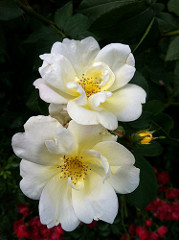

In [33]:
print(str(roses[0]))

PIL.Image.open(str(roses[0]))

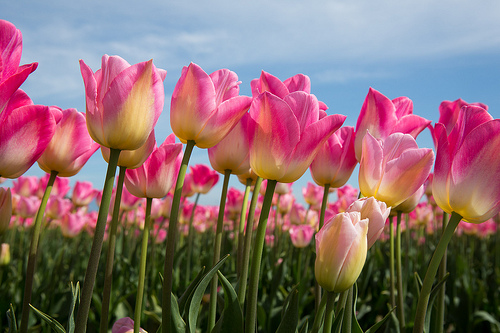

In [34]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

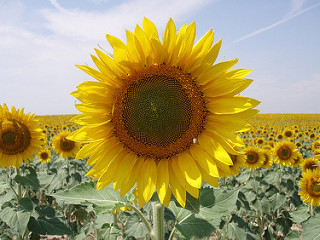

In [35]:
sunflower = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflower[1]))

In [79]:
#just for fun 
#Creating a Dictnories of all the flowers and path associated with it

Images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'diasy': list(data_dir.glob('diasy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),

    
}

Images_dict['roses']   #Calling with key

[WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/

# Part-2: Data preparation | model building

It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

###### tf.keras.utils.image_dataset_from_directory

In [80]:
#Creating some parametrs for loader

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed = 123,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [81]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed = 123,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [82]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


###### visualize the data
the first 9 images of traing dataset

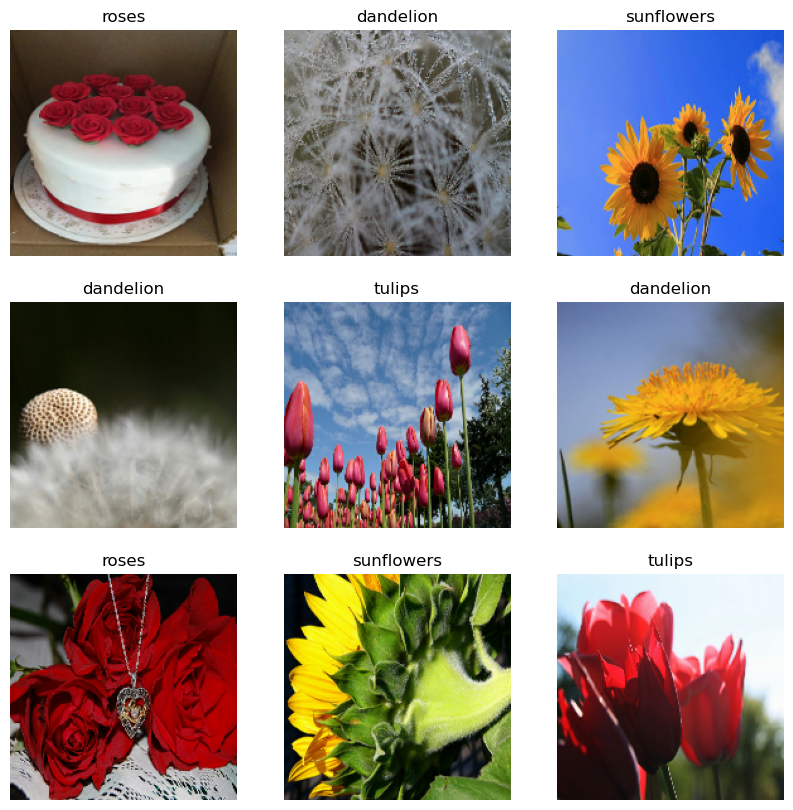

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))


for images, label in train_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [96]:
for image_batch, label_batch in train_ds:    #image_batch <-> a  | label_batch<-> b
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

## Configure the dataset for performance
- Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking
- Dataset.cache and Dataset.prefetch are two important methods you should use when loading data


https://www.tensorflow.org/tutorials/images/classification#configure_the_dataset_for_performance

In [98]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Standardize the data using:   tf.keras.layers.Rescaling


In [99]:
#tf.keras.layers.Rescaling

normalization_layers = layers.Rescaling(1./255)

# Applying Data Augmentation to imporove accuracy